### Mixture of Experts (MoE) Transformer with Llama4 type model 

Author: Tirth Shah  
Inspired by: https://github.com/FareedKhan-dev/train-llama4

#### Import Required Libraries and Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Import our custom modules
from model import MoETransformer, ModelConfig
from prepare_data import CharDataset, TinyStoriesDataset
from train import TrainModel
import utils as utils

/home/tirth/miniforge-pypy3/envs/moe-experiments/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set random seed for reproducibility

In [2]:
torch.manual_seed(42)

#### Prepare Dataset

In [3]:
#--------- Sample text from Alice's Adventures in Wonderland ---------#
# This is a small excerpt to keep the dataset manageable for demonstration purposes.

# block_size = 64 # Define the block size for the dataset

# text = """
#     Alice was beginning to get very tired of sitting by her sister on the
#     bank, and of having nothing to do: once or twice she had peeped into the
#     book her sister was reading, but it had no pictures or conversations in
#     it, 'and what is the use of a book,' thought Alice 'without pictures or
#     conversation?'
#     So she was considering in her own mind (as well as she could, for the
#     hot day made her feel very sleepy and stupid), whether the pleasure
#     of making a daisy-chain would be worth the trouble of getting up and
#     picking the daisies, when suddenly a White Rabbit with pink eyes ran
#     close by her.
#     """

# dataset = CharDataset(text=text, block_size=block_size) # Create dataset

#--------- Tiny stories dataset ---------#

block_size = 64 # Define the block size for the dataset
dataset = TinyStoriesDataset(block_size=block_size, max_samples=100000)  # Load the dataset


TinyStoriesDataset loaded with 100000 stories and vocabulary size 17938


#### Initialize MoE Transformer Model

In [4]:
# Model configuration
model_config = ModelConfig(
    d_model=128, 
    n_layers=4,
    n_heads=4,
    block_size=block_size,
    vocab_size=dataset.tokenizer.vocab_size,
    rms_norm_eps=1e-5,
    rope_theta=10000.0,
    num_local_experts=4,
    num_experts_per_tok=2,
    intermediate_size_expert=256,
    intermediate_size_shared=256
)

# Initialize the model
model = MoETransformer(config=model_config)
model = model.to(model.config.device)

# Print model summary
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model initialized successfully!")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Model initialized successfully!
Total parameters: 6,823,040
Trainable parameters: 6,823,040


#### Train the Model

Setting up training configuration

In [5]:
train_model = TrainModel(
    model=model,
    batch_size=16,
    learning_rate=5e-4,
    epochs=3000, # 3000 epochs
    print_interval=300,
    dataset=dataset,
    test_split=0.1
)

Training the model

Starting training...


  8%|▊         | 251/3000 [00:14<02:34, 17.74it/s]

 10%|█         | 303/3000 [00:17<02:31, 17.77it/s]

  Epoch 300/3000, Loss: 3.7087


 16%|█▌        | 479/3000 [00:27<02:23, 17.60it/s]

 20%|██        | 603/3000 [00:34<02:20, 17.11it/s]

  Epoch 600/3000, Loss: 3.4181


 29%|██▉       | 879/3000 [00:51<02:06, 16.82it/s]

 30%|██▉       | 895/3000 [00:52<02:10, 16.15it/s]

 30%|███       | 903/3000 [00:52<02:10, 16.06it/s]

  Epoch 900/3000, Loss: 2.9660


 30%|███       | 913/3000 [00:53<02:10, 15.98it/s]

 40%|████      | 1203/3000 [01:10<01:42, 17.57it/s]

  Epoch 1200/3000, Loss: 2.7596


 46%|████▌     | 1383/3000 [01:20<01:31, 17.63it/s]

 47%|████▋     | 1417/3000 [01:22<01:32, 17.16it/s]

 48%|████▊     | 1429/3000 [01:23<01:30, 17.29it/s]

 49%|████▉     | 1483/3000 [01:26<01:25, 17.72it/s]

 50%|█████     | 1503/3000 [01:27<01:24, 17.66it/s]

  Epoch 1500/3000, Loss: 2.5558


 57%|█████▋    | 1717/3000 [01:40<01:18, 16.37it/s]

 60%|██████    | 1803/3000 [01:45<01:11, 16.68it/s]

  Epoch 1800/3000, Loss: 2.4364


 61%|██████    | 1827/3000 [01:46<01:10, 16.64it/s]

 62%|██████▏   | 1857/3000 [01:48<01:09, 16.34it/s]

 62%|██████▏   | 1869/3000 [01:49<01:10, 16.00it/s]

 68%|██████▊   | 2037/3000 [01:58<00:54, 17.56it/s]

 70%|██████▉   | 2089/3000 [02:01<00:51, 17.71it/s]

 70%|███████   | 2103/3000 [02:02<00:50, 17.71it/s]

  Epoch 2100/3000, Loss: 2.2591


 71%|███████   | 2131/3000 [02:04<00:49, 17.71it/s]

 72%|███████▏  | 2155/3000 [02:05<00:47, 17.67it/s]

 78%|███████▊  | 2351/3000 [02:16<00:40, 16.03it/s]

 80%|████████  | 2403/3000 [02:20<00:37, 16.02it/s]

  Epoch 2400/3000, Loss: 2.4889


 87%|████████▋ | 2599/3000 [02:32<00:24, 16.61it/s]

 88%|████████▊ | 2655/3000 [02:35<00:19, 17.28it/s]

 90%|█████████ | 2703/3000 [02:38<00:17, 17.09it/s]

  Epoch 2700/3000, Loss: 2.6721


 94%|█████████▍| 2815/3000 [02:44<00:10, 17.68it/s]

 99%|█████████▉| 2983/3000 [02:53<00:00, 17.70it/s]

100%|██████████| 3000/3000 [02:54<00:00, 17.15it/s]


  Epoch 3000/3000, Loss: 2.2089


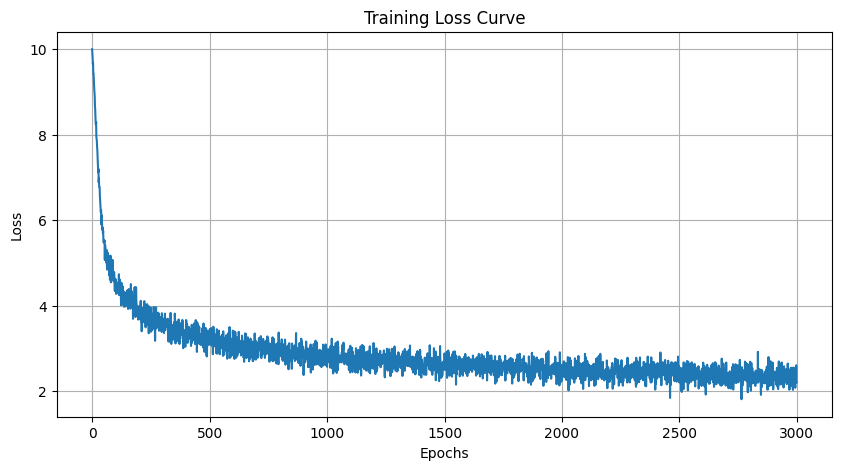

Training completed.
Final training loss: 2.2089


In [6]:
train_model.train()

print(f"Final training loss: {train_model.train_losses[-1]:.4f}")

#### Save the Model

In [ ]:
utils.save_model(
    model=model,
    save_dir="./saved_models",
    save_name=f"moe_transformer_tiny_stories_topk_{model_config.num_experts_per_tok}.pth"
)

Model saved to ./saved_models/moe_transformer_tiny_stories_topk_2.pth


#### Generate some text using the trained model

In [8]:
model.generate(
    seed_text="Once upon a time,",
    tokenizer=dataset.tokenizer,
    max_new_tokens=model_config.block_size,
)

Generation loop finished.


'Once upon a time, there was a little boy named Timmy. Timmy loved out and playing with his toys. At the hospital every week for from the park where he went. \n\nOne day, Timmy saw a little One day, Timmy and he wanted to climb the sun. He put on it, but he could'